In [86]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten
import glob as gb 
from tensorflow.keras import Sequential
import pandas as pd
import numpy as np 
from tensorflow.keras.utils import to_categorical

In [87]:
os.getcwd()

'C:\\Users\\Abdelrahman Ahmed'

In [88]:
train_path="C:\\Users\\Abdelrahman Ahmed\\CNN Data3\\train.csv"
test_path="C:\\Users\\Abdelrahman Ahmed\\CNN Data3\\test.csv"

In [89]:
train_data=pd.read_csv(train_path)
test_data=pd.read_csv(test_path)

In [90]:
train=train_data.drop(columns=["label"])
y_train=train_data["label"] 

In [91]:
x_train=train.values.reshape(-1,28,28,1)
x_test=test_data.values.reshape(-1,28,28,1)

In [92]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

In [93]:
y_train=to_categorical(y_train,num_classes=10)

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.1)

In [95]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [96]:
optimizer =tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

C:\Users\Abdelrahman Ahmed\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [97]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    zoom_range=.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False)

In [98]:
datagen.fit(x_train)

In [99]:
X_train.shape

(37800, 28, 28, 1)

In [100]:
y_train.shape

(37800, 10)

In [101]:
model.fit_generator(datagen.flow(X_train,y_train),validation_data=(X_val,y_val),epochs=1,callbacks=[reduce_lr])

C:\Users\Abdelrahman Ahmed\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1182/1182 [==============================] - 167s 140ms/step - loss: 0.3181 - accuracy: 0.8993 - val_loss: 4.2982 - val_accuracy: 0.9798


In [102]:
prediction=model.predict(x_test)

In [110]:
prediction[5]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

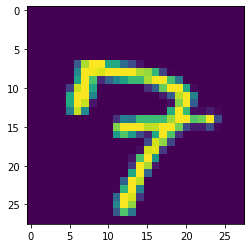

In [109]:
plt.imshow(x_test[5])